In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [57]:
info_file=pd.read_csv("heart_disease_uci.csv")

In [58]:
info_file.isnull().sum()
info_file.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [59]:
info_file.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [60]:
cleaned_file=info_file.dropna()
cleaned_file.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [61]:
X=cleaned_file[['age','trestbps']].values
y=cleaned_file['num'].values

In [62]:
np.random.seed(42)

weight = np.random.randn()
bias = np.random.randn()
learning_rate = 0.01
def calculate_logs(X,weight,bias):
    z = bias +  np.dot(X,weight)
    return z


In [63]:
def _sigmoid(z):
        z = np.clip(z, -500, 500) 
        return 1 / (1 + np.exp(-z))
def gradient_descent_step(weight, bias, X, y, learning_rate):
    m = len(X)
    z = calculate_logs(X, weight, bias)
    pred = _sigmoid(z)
    error = pred - y.reshape(-1,1)
    
    gradient_weight = (1/m) *np.dot(X.T,error)  
    gradient_bias = (1/m) * np.sum(error)
    
    weight -= learning_rate * gradient_weight
    bias -= learning_rate * gradient_bias
    return weight, bias
epochs = 1000
losses = []
X = (X-X.mean())/X.std()
for epoch in range(epochs):
    weight,bias = gradient_descent_step(weight,bias,X,y,learning_rate)
    z = calculate_logs(X,weight,bias)
    pred = np.clip(_sigmoid(z), 1e-15, 1 - 1e-15)
    pred = _sigmoid(z)
    loss = -np.mean(y.reshape(-1,1) * np.log(pred) + (1 - y.reshape(-1,1)) * np.log(1 - pred))
    losses.append(loss)

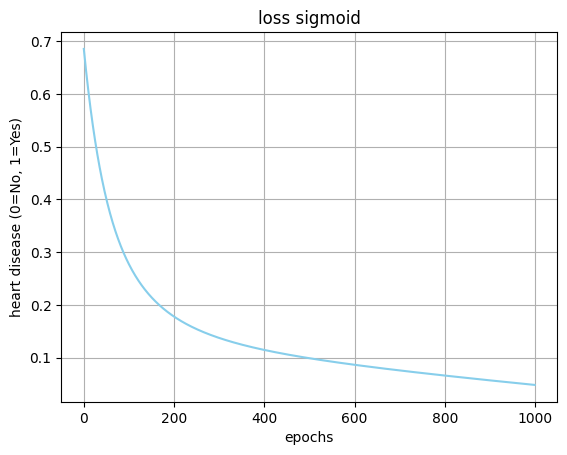

In [64]:
plt.plot(losses, color="skyblue")
plt.title("loss sigmoid")
plt.xlabel("epochs")
plt.ylabel("heart disease (0=No, 1=Yes)")
plt.grid(True)
plt.show()